# BE Noté _Machine Learning_

## Partie 1. Analyse de données ISAR

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. On commence par observer la base de données.

F4 162
A10 162
F16 162
F14 162
F15 162


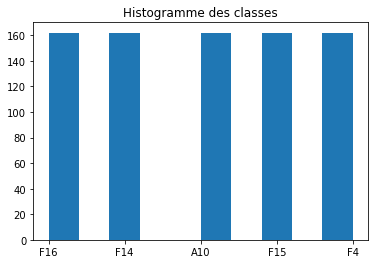

In [6]:
# On charge les noms de fichiers dans une liste
files = os.listdir('images_ISAR')

# les noms sont de la forme classe_nbr.bmp
# on extrait les classes
classes = [f.split('_')[0] for f in files]

# on extrait le nombre d'images par classe
for c in set(classes):
    print(c, classes.count(c))

# Affichage sous form d'histogramme
plt.hist(classes)
plt.title("Histogramme des classes")
plt.show()


In [16]:
# on charge une image pour analyser l'espace de données
from PIL import Image
img = Image.open('images_ISAR/'+files[0])
img = np.array(img)

print("Dimensions de l'espace de données : ", img.shape)
print("Valeur min : ", img.min())
print("Valeur max : ", img.max())

Dimensions de l'espace de données :  (256, 256)
Valeur min :  0
Valeur max :  255


Dimensions de l'espace de données :  (61, 133)
Gain en taille :  8.07789966720079


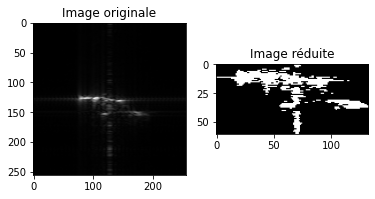

In [24]:
# On commence par réduire la taille des images en ne gardant que le centre, i.e. les valeurs les plus importantes
# on supprime les valeurs inférieures à une valeur donnée, et on garde les autres dans un ndarray de la bonne taille
def crop_image(img, threshold=40):
    res = np.copy(img)
    res[res<threshold] = 0
    res[res>=threshold] = 1
    # on supprime les lignes et colonnes nulles
    res = res[res.any(axis=1)]
    res = res[:, res.any(axis=0)]
    return res

# on applique la fonction à l'image de test
img_crop = crop_image(img)
print("Dimensions de l'espace de données : ", img_crop.shape)
print("Gain en taille : ", img.size/img_crop.size)

# on affiche les deux images
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Image originale")
plt.subplot(1,2,2)
plt.imshow(img_crop, cmap='gray')
plt.title("Image réduite")
plt.show()

2. On charge toutes les images dans une matrice de données.

In [26]:
# on charge toutes les images dans une matrice de données

# on crée une matrice de données vide
data = np.zeros((len(files), img_crop.size))

# on charge les images
for i, f in enumerate(files):
    img = Image.open('images_ISAR/'+f)
    img = np.array(img)

print("Dimensions de la matrice de données : ", data.shape)

# on charge les labels (classes)
labels = np.array(classes)
print("Dimensions du vecteur de labels : ", labels.shape)

Dimensions de la matrice de données :  (810, 10004)
Dimensions du vecteur de labels :  (810,)
